# Class 26: Unsupervised learning

Plan for today:
- Hierarchical clustering
- Quick demo of using an LLM/chatbot in Python


## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [1]:
import YData

# YData.download.download_class_code(26)   # get class code    
# YData.download.download_class_code(26, TRUE) # get the code with the answers 


If you are using colabs, you should install the YData packages by uncommenting and running the code below.

In [2]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Unsupervised learning: Hierarchical clustering

In unsupervised machine learning, we try to find patterns in the data using only a set of features X (without any labels y). 

Let's explore clustering which is a form of unsupervised learning. 


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


penguins = sns.load_dataset("penguins")

penguins = penguins.dropna()

penguins = penguins.sample(frac = 1)


# get the features and the labels
X_penguin_features = penguins[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
y_penguin_labels = penguins['species']



In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

#  Ward's method adds points to a cluster that minimizes the sum of squared differences within all clusters
clusters = hierarchy.linkage(X_penguin_features, method="ward")   


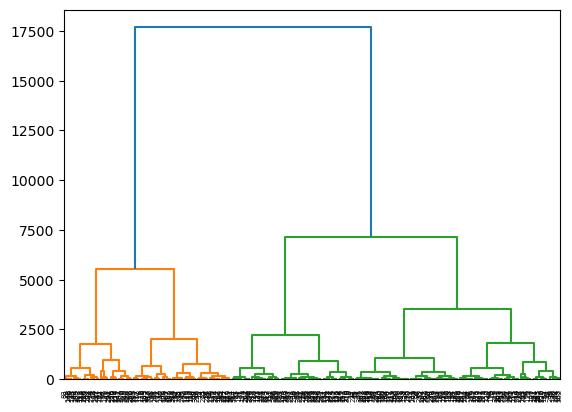

In [13]:
# display a dendrogram
dendrogram = hierarchy.dendrogram(clusters)

In [14]:
# cluster points into 3 clusters 
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(X_penguin_features)

# get the predicted cluster for each point
labels = clustering_model.labels_

labels

array([0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0,

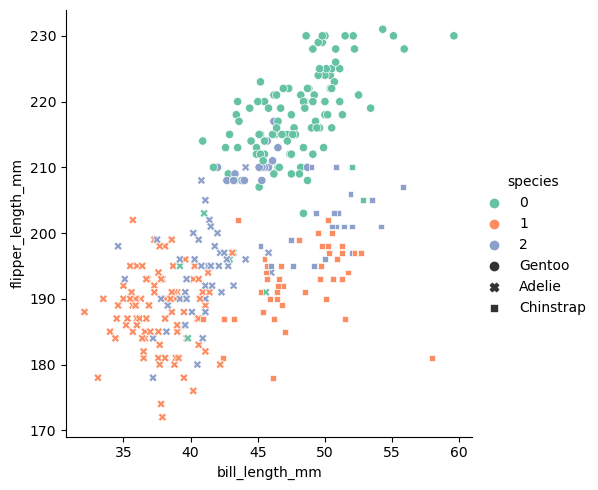

In [15]:
# visualize how well the clustering matches the penguin species

sns.relplot(X_penguin_features, 
            x='bill_length_mm', 
            y='flipper_length_mm', 
            hue=labels, 
            style = y_penguin_labels,
            palette="Set2");


## 2. Chatbots 

Large language models (LLMs) are taking over the world. I, for one, welcome our new robot [overlords](https://www.youtube.com/watch?v=8lcUHQYhPTE).

Let's explore how we can use a model from HuggingFace to create a chatbot.

To do this we need to install some additional packages. I recommend cloning your Jupyter environment, and then adding these packages to the new environment.


In [ ]:
# uncomment the code in this cell and RUN IT ONLY ONCE to create a new conda environment 
# that will have the packages necessary to create a chatbot

# Note: this might not work. I recommend only trying this after you've finished all 
# the rest of the work for the class - i.e., after you've turned in your final project

#!conda create --name ydata123_2024c --clone ydata123_2024a
#!conda activate ydata123_2024c
#!conda install conda-forge::transformers -y
#!conda install pytorch::pytorch==2.2.2
#!conda install conda-forge::tensorflow -y
#!conda install conda-forge::flax -y


In [1]:
# Modified from code created by Giuliano Formisano

# load libs
import pandas as pd
import numpy as np
from transformers import pipeline, Conversation

# load conversational pipeline
chatbot = pipeline(model="facebook/blenderbot-400M-distill")

2024-04-24 16:49:00.972990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/em939/anaconda3/envs/ydata123_2024a/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [9]:
# set user input
user_input = "Hi! What can you do?" # add your prompt here

# generate response using pipeline
response = chatbot(user_input)

# print results
print(f"User: {user_input}")
print(f"Chatbot: {response[0]['generated_text']}")

User: Hi! What can you do?
Chatbot:  I don't know what to do. I feel like I can't do anything about it.


### Loop for an interaction User-Chatbot

In [7]:
# Loop of interaction user-chatbot
while True:
  user_input = input("You: ") # add prompt in the appearing box below
  if user_input.lower() == "quit": # write "quit" to interrupt
    break
  response = chatbot(user_input) # this is a bit slow
  print(f"Chatbot: {response[0]['generated_text']}")

You:  quit
